In [78]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# The following variables represents for the ATNA face dataset
trainX1 = scipy.io.loadmat('ATNT face/trainX.mat')['trainX']
trainY1 = scipy.io.loadmat('ATNT face/trainY.mat')['trainY'][0]
trainX1 = np.array(trainX1)
trainY1 = np.array(trainY1)
testX1 = scipy.io.loadmat('ATNT face/testX.mat')['testX']
testY1 = scipy.io.loadmat('ATNT face/testY.mat')['testY'][0]
testX1 = np.array(testX1)
testY1 = np.array(testY1)

# The following variables represents for the Binalpha handwritten dataset
trainX2 = scipy.io.loadmat('Binalpha handwritten/trainX.mat')['trainX']
trainY2 = scipy.io.loadmat('Binalpha handwritten/trainY.mat')['trainY'][0]
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)
testX2 = scipy.io.loadmat('Binalpha handwritten/testX.mat')['testX']
testY2 = scipy.io.loadmat('Binalpha handwritten/testY.mat')['testY'][0]
testX2 = np.array(testX2)
testY2 = np.array(testY2)

In [80]:
class DB_classifier():
    def __init__(self):
        self.no_label = 0
    def train(self,X,Y):
        self.trainX=X
        self.trainY=Y
    def distance(self,v1,v2):
        dist = np.sqrt(np.sum(np.square(v1 - v2)))
        return dist
    def majority_voting(self,X):
        label = np.argmax(np.bincount(X))
        return label
    def fit(self,X,r):
        self.no_label = 0
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                dists[i][j]=dist
        predY = np.zeros(num_test)
        for i in range(num_test):
            inside_index = []
            for j in range(num_train):
                if dists[i][j] < r:
                    inside_index.append(j)
            y_inR = self.trainY[inside_index]
            try:
                predY[i] = self.majority_voting(y_inR.tolist())
            except:
                self.no_label+=1
                continue
        return predY
    def accuracy(self,X,Y,r):
        predY = self.fit(X,r)
        if self.no_label!=0:
            no_index = []
            length = len(predY)-self.no_label
            new_predY = np.zeros(length)
            new_testY = np.zeros(length)
            trace1=0
            trace2=0
            for i in range(len(predY)):
                if predY[i]==0:
                    no_index.append(i)
                else:
                    new_predY[trace1]=predY[i]
                    trace1+=1
            for i in range(len(Y)):
                if i not in no_index:
                    new_testY[trace2]=Y[i]
                    trace2+=1
            accuracy = np.mean(new_predY==new_testY)
        else:
            accuracy = np.mean(predY==Y)
        return accuracy
    def min_dis(self,X):
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        mindis = self.distance(X[:,1],self.trainX[:,1])
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                if mindis > dist:
                    mindis = dist
        return mindis
    def max_dis(self,X):
        num_test = len(X[0])
        num_train = len(self.trainX[0])
        maxdis = self.distance(X[:,1],self.trainX[:,1])
        for i in range(num_test):
            for j in range(num_train):
                dist = self.distance(X[:,i],self.trainX[:,j])
                if maxdis < dist:
                    maxdis = dist
        return maxdis    


In [81]:
db1 = DB_classifier()
db1.train(trainX1,trainY1)
print('The smallest distance for ATNT face data: %f' % db1.min_dis(testX1))
print('The largest distance for ATNT face data: %f' % db1.max_dis(testX1))

The smallest distance for ATNT face data: 145.424613
The largest distance for ATNT face data: 2172.680536


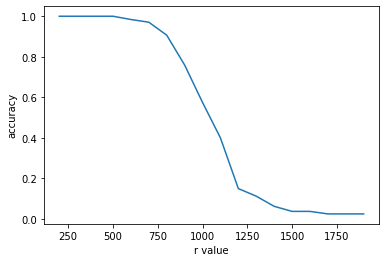

In [82]:

accls = []
nolabls = []
rls =list(range(200,2000,100))
for r in rls:
    accls.append(db1.accuracy(testX1,testY1,r))
    nolabls.append(db1.no_label)
plt.plot(rls,accls)
plt.ylabel("accuracy")
plt.xlabel("r value")
plt.show()
#print('accuracy: %f' % accuracy)

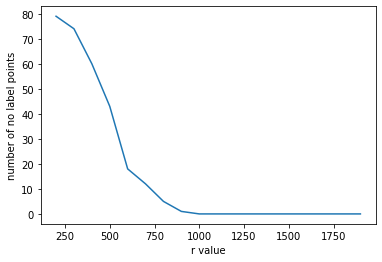

In [83]:
plt.plot(rls,nolabls)
plt.ylabel("number of no label points")
plt.xlabel("r value")
plt.show()